#Bank Loan Model Project
This project, I aim to develop a classifier for identifying potential customers who are more likely to purchase a personal loan using the Thera-Bank dataset. Thera-Bank is interested in expanding their loan business by converting liability customers into retail loan customers, while keeping them as depositors. The retail marketing department is developing campaigns with better target marketing to increase the success rate with a minimal budget.

##content
Column descriptions ID Customer ID Age Customer's age in completed years Experience #years of professional experience Income Annual income of the customer ($000).

ZIP Code Home Address. Family Family size of the customer CCAvg Avg. spending on credit cards per month ($)
Education Level.

 1: Undergrad; 2: Graduate; 3: Advanced/Professional Mortgage Value of house mortgage if any. ($000) Personal Loan Did this customer accept the personal loan offered in the last campaign? Securities Account Does the customer have a securities account with the bank? CD Account Does the customer have a certificate of deposit (CD) account with the bank? Online Does the customer use internet banking facilities? CreditCard Does the customer uses a credit card issued by UniversalBank?



ID (Customer ID): Customer identification code.

Age: Age of the customer in completed years.

Experience: Number of years of professional experience.

Income: Annual income of the customer in thousands of dollars.

ZIPCode: Home address ZIP code.

Family: Family size of the customer.

CCAvg (Credit Card Average): Average spending on credit cards per month in thousands of dollars.

Education: Education level of the customer. (1: Undergraduate; 2: Graduate; 3: Advanced/Professional)

Mortgage: Value of the house mortgage, if any, in thousands of dollars.

Personal Loan: Whether the customer accepted the personal loan offered in the last campaign (Binary: 1 or 0).

Securities Account: Whether the customer has a securities account with the bank (Binary: 1 or 0).

CD Account: Whether the customer has a certificate of deposit (CD) account with the bank (Binary: 1 or 0).

Online: Whether the customer uses internet banking facilities (Binary: 1 or 0).

CreditCard: Whether the customer uses a credit card issued by UniversalBank (Binary: 1 or 0).


In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif

In [2]:
Bank_Personal = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

#Get Some Information

In [3]:
Bank_Personal

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [4]:
Bank_Personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
Bank_Personal.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
Bank_Personal.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937913     1.881000    56.498800       0.096000   
std       1.147663     1.747666     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [7]:
#Number of customers
personal_loan_counts = Bank_Personal["Personal Loan"].value_counts()
print(f"Number of customers with Personal Loan:\n{personal_loan_counts[1]}")
print(f"Number of customers without Personal Loan:\n{personal_loan_counts[0]}")

Number of customers with Personal Loan:
480
Number of customers without Personal Loan:
4520


In [8]:
Bank_Personal.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
categorical_variables=[col for col in Bank_Personal.columns if Bank_Personal[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in Bank_Personal.columns if Bank_Personal[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [10]:
#check duplicated rows
Bank_Personal.duplicated().sum()

0

#Data Preprocessing


In [11]:
# Change the data type of 'ZIP Code' to object
Bank_Personal['ZIP Code'] = Bank_Personal['ZIP Code'].astype(object)

#Change the data type of multiple columns to boolean
columns_to_convert = ['CreditCard', 'Personal Loan', 'Securities Account', 'CD Account', 'Online']
Bank_Personal[columns_to_convert] = Bank_Personal[columns_to_convert].astype(bool)


In [12]:
Bank_Personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   bool   
 10  Securities Account  5000 non-null   bool   
 11  CD Account          5000 non-null   bool   
 12  Online              5000 non-null   bool   
 13  CreditCard          5000 non-null   bool   
dtypes: bool(5), float64(1), int64(7), object(1)
memory usage: 376.1+ KB


In [13]:
# show number of Experience < 0
Bank_Personal[Bank_Personal['Experience'] < 0]['Experience'].value_counts()
# Convert Experience < 0 to positive number
Bank_Personal.loc[Bank_Personal['Experience']<0,'Experience']=np.abs(Bank_Personal['Experience'])

In [14]:
columns_to_drop = ['ID']
Bank_Personal = Bank_Personal.drop(columns=columns_to_drop)
Bank_Personal

Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49    91107       4    1.6          1         0   
1      45          19      34    90089       3    1.5          1         0   
2      39          15      11    94720       1    1.0          1         0   
3      35           9     100    94112       1    2.7          2         0   
4      35           8      45    91330       4    1.0          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4995   29           3      40    92697       1    1.9          3         0   
4996   30           4      15    92037       4    0.4          1        85   
4997   63          39      24    93023       2    0.3          3         0   
4998   65          40      49    90034       3    0.5          2         0   
4999   28           4      83    92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0             False                True       False   False       False  
1             False                True       False   False       False  
2             False               False       False   False       False  
3             False               False       False   False       False  
4             False               False       False   False        True  
...             ...                 ...         ...     ...         ...  
4995          False               False       False    True       False  
4996          False               False       False    True       False  
4997          False               False       False   False       False  
4998          False               False       False    True       False  
4999          False               False       False    True        True  

[5000 rows x 13 columns]

There are different methods to identify outliers in the data. Some of these methods are:

Boxplot diagram: This method is used in the analysis of continuous data, and outliers can be identified by analyzing certain areas of the Boxplot diagram.

Cook's method: In this method, by calculating the average and standard deviation of the data, the permissible range for the data is determined, and then the data that are outside this range are known as outliers.

standard deviation method: In this method, data that are more than 3 standard deviations away from the average data are known as outliers. Boxplot diagram: This method is used in the analysis of continuous data, and by analyzing certain areas of the Boxplot diagram, outliers can be identified.

The method of the smallest and largest data: In this method, the value of the smallest and largest data is calculated, and then the data that are outside this range are known as outliers

In [15]:
#Treatment of outliers
from scipy import stats
for col in ['Mortgage','CCAvg']:
  # Calculate the mean and standard deviation of the data
  mean = Bank_Personal[col].mean()
  std = Bank_Personal[col].std()

  # Determining the threshold
  threshold = 3

  # Identifying outliers using z-score
  z_scores = (Bank_Personal[col] - mean) / std
  outliers = z_scores[abs(z_scores) > threshold].index
  print(f"number of outlier in {col} is :{Bank_Personal[stats.zscore(Bank_Personal[col])>3][col].count()}")
  # # Remove outliers
  Bank_Personal = Bank_Personal.drop(outliers)
  Bank_Personal.reset_index(drop=True, inplace=True)

Bank_Personal

number of outlier in Mortgage is :105
number of outlier in CCAvg is :107


Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49    91107       4    1.6          1         0   
1      45          19      34    90089       3    1.5          1         0   
2      39          15      11    94720       1    1.0          1         0   
3      35           9     100    94112       1    2.7          2         0   
4      35           8      45    91330       4    1.0          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4783   29           3      40    92697       1    1.9          3         0   
4784   30           4      15    92037       4    0.4          1        85   
4785   63          39      24    93023       2    0.3          3         0   
4786   65          40      49    90034       3    0.5          2         0   
4787   28           4      83    92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0             False                True       False   False       False  
1             False                True       False   False       False  
2             False               False       False   False       False  
3             False               False       False   False       False  
4             False               False       False   False        True  
...             ...                 ...         ...     ...         ...  
4783          False               False       False    True       False  
4784          False               False       False    True       False  
4785          False               False       False   False       False  
4786          False               False       False    True       False  
4787          False               False       False    True        True  

[4788 rows x 13 columns]



Attribute conversion

In this data set, CCAVG represents the average monthly credit card cost, but revenue represents the amount of annual revenue. To equalize the units of characteristics, we get the amount of monthly income


In [16]:
Bank_Personal['Income'] = Bank_Personal['Income']/12

In [17]:
cat_Features = ['CD Account','Education','Family','Securities Account','Online','CreditCard']
target_variable = 'Personal Loan'

In [18]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in Bank_Personal.select_dtypes(include=['object','bool']).columns:

    # Print the column name and the unique values
    print(f"{col}: {Bank_Personal[col].unique()}")

# Loop over each column in the DataFrame where dtype is 'object'
for col in Bank_Personal.select_dtypes(include=['object','bool']).columns:
    # Convert all values to strings
    Bank_Personal[col] = Bank_Personal[col].astype(str)

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(Bank_Personal[col].unique())

    # Transform the column using the encoder
    Bank_Personal[col] = label_encoder.transform(Bank_Personal[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {Bank_Personal[col].unique()}")

ZIP Code: [91107 90089 94720 94112 91330 92121 91711 93943 94710 90277 93106 94920
 91741 95054 95010 94305 94015 90095 91320 95521 95064 90064 94539 94104
 94117 94801 94035 92647 95814 94114 94115 92672 94122 95616 94065 95014
 91380 95747 92373 92093 94005 90245 95819 90404 93407 94523 90024 91360
 95670 95123 90045 91335 93907 92007 94606 94611 94901 92220 93305 95134
 94612 92507 91730 94501 94303 94105 94550 92612 95617 92374 94080 94608
 93555 93311 94704 92717 92037 95136 94542 94143 91775 92703 92354 92024
 92831 92833 90057 92130 91301 92096 92646 92182 92131 90840 95035 93010
 94928 95831 91770 94102 91423 93955 92834 93117 94551 94596 94025 94545
 95053 90036 91125 95120 94706 95827 90503 90250 95817 93111 94132 95818
 91942 90401 93524 95133 92173 94043 92521 92122 93118 92697 94577 91345
 94123 92152 91355 94609 94306 96150 94110 94707 91604 90291 92807 95051
 94085 92677 94304 92614 92626 94583 92103 92691 94107 92407 90504 94002
 95039 94063 94923 95023 90058 92126 9411

#Correlation

 If the correlation coefficient between two variables is greater than 0.7, it is considered as a strong correlation. If the correlation coefficient between two variables is between 0.3 and 0.7, it is considered as a moderate correlation. If the correlation coefficient between two variables is less than 0.3, it is considered as a weak correlation.

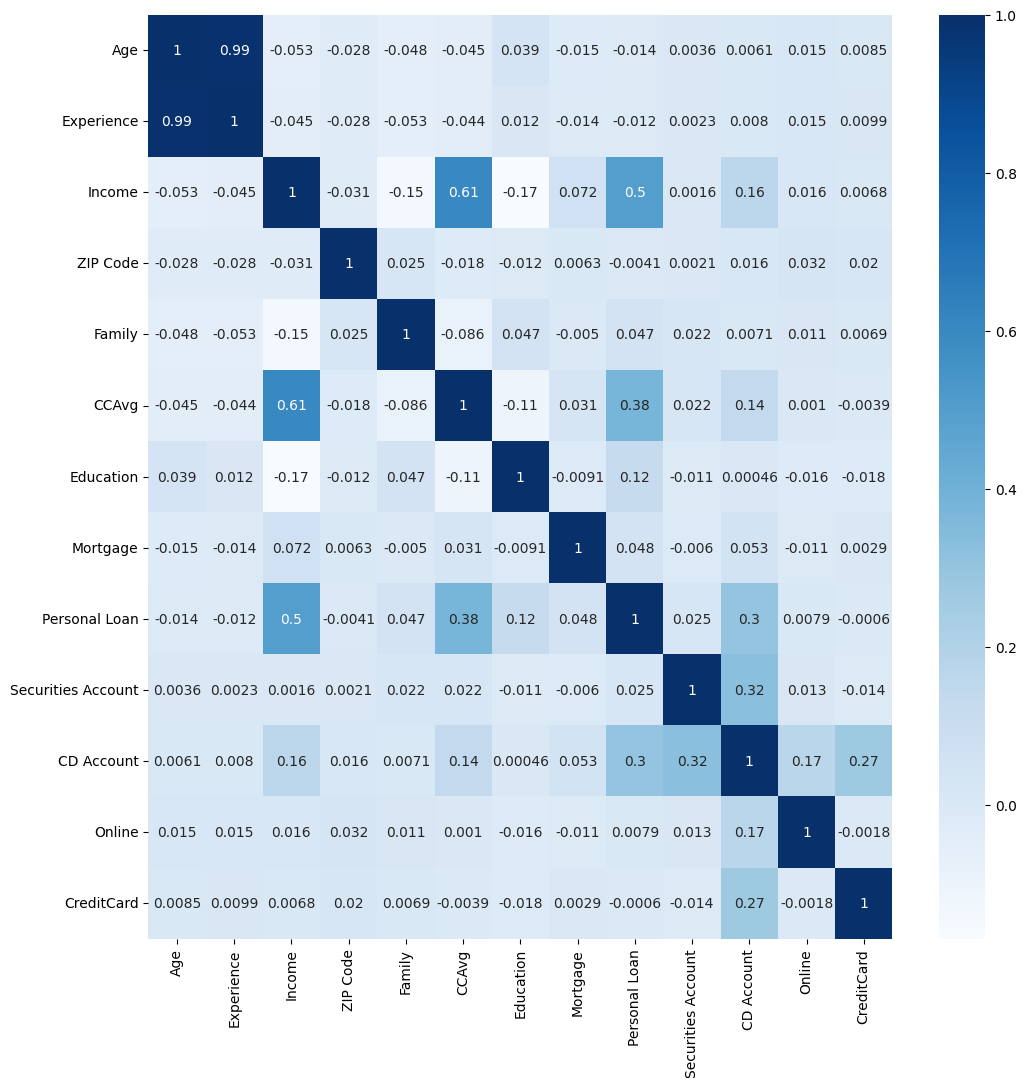

In [19]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(Bank_Personal.corr(),cmap='Blues',annot =True)
plt.savefig("correlation")
plt.show()

Personal Loan is highly correlated with Income, CD_Account, CCAvg.

Experience is highly correlated with Age. (ρ = 1)
CCAvg is correlated with Income to a good extent. (ρ = 0.6)



Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models



#Data Analysis

sns.pairplot is a powerful tool for getting a visual overview of the relationships and distributions within a dataset. It is especially useful for exploratory data analysis (EDA) to identify patterns, trends, and potential areas of interest for further investigation. And also,it is a powerful tool for getting a visual overview of the relationships and distributions within a dataset.

Univariate Distributions:

  Along the diagonal of the pairplot, you'll see histograms or kernel density plots for each variable, showing the univariate distribution of each variable.

Bivariate Relationships:

  In the lower and upper triangles of the pairplot grid, scatterplots are displayed for pairs of variables, showing the bivariate relationships between them. Each point in the scatterplot represents an observation in the dataset.

Correlation Information:

  By visually inspecting the scatterplots, you can get an idea of the correlation or relationship between different pairs of variables. The orientation and shape of the scatterplots can indicate whether there is a positive or negative correlation.

Identifying Outliers:

   Outliers or unusual observations in the data can often be visually identified in the scatterplots. Points that deviate significantly from the overall pattern may stand out.

Pairwise Comparisons:

   The pairplot allows you to quickly compare all pairs of variables in the dataset, making it useful for gaining an overview of relationships and potential patterns.

Faceting by Categorical Variables:

   If the dataset contains categorical variables, you can use the hue parameter to create separate subplots for different categories. This allows you to see how the relationships differ across categories.

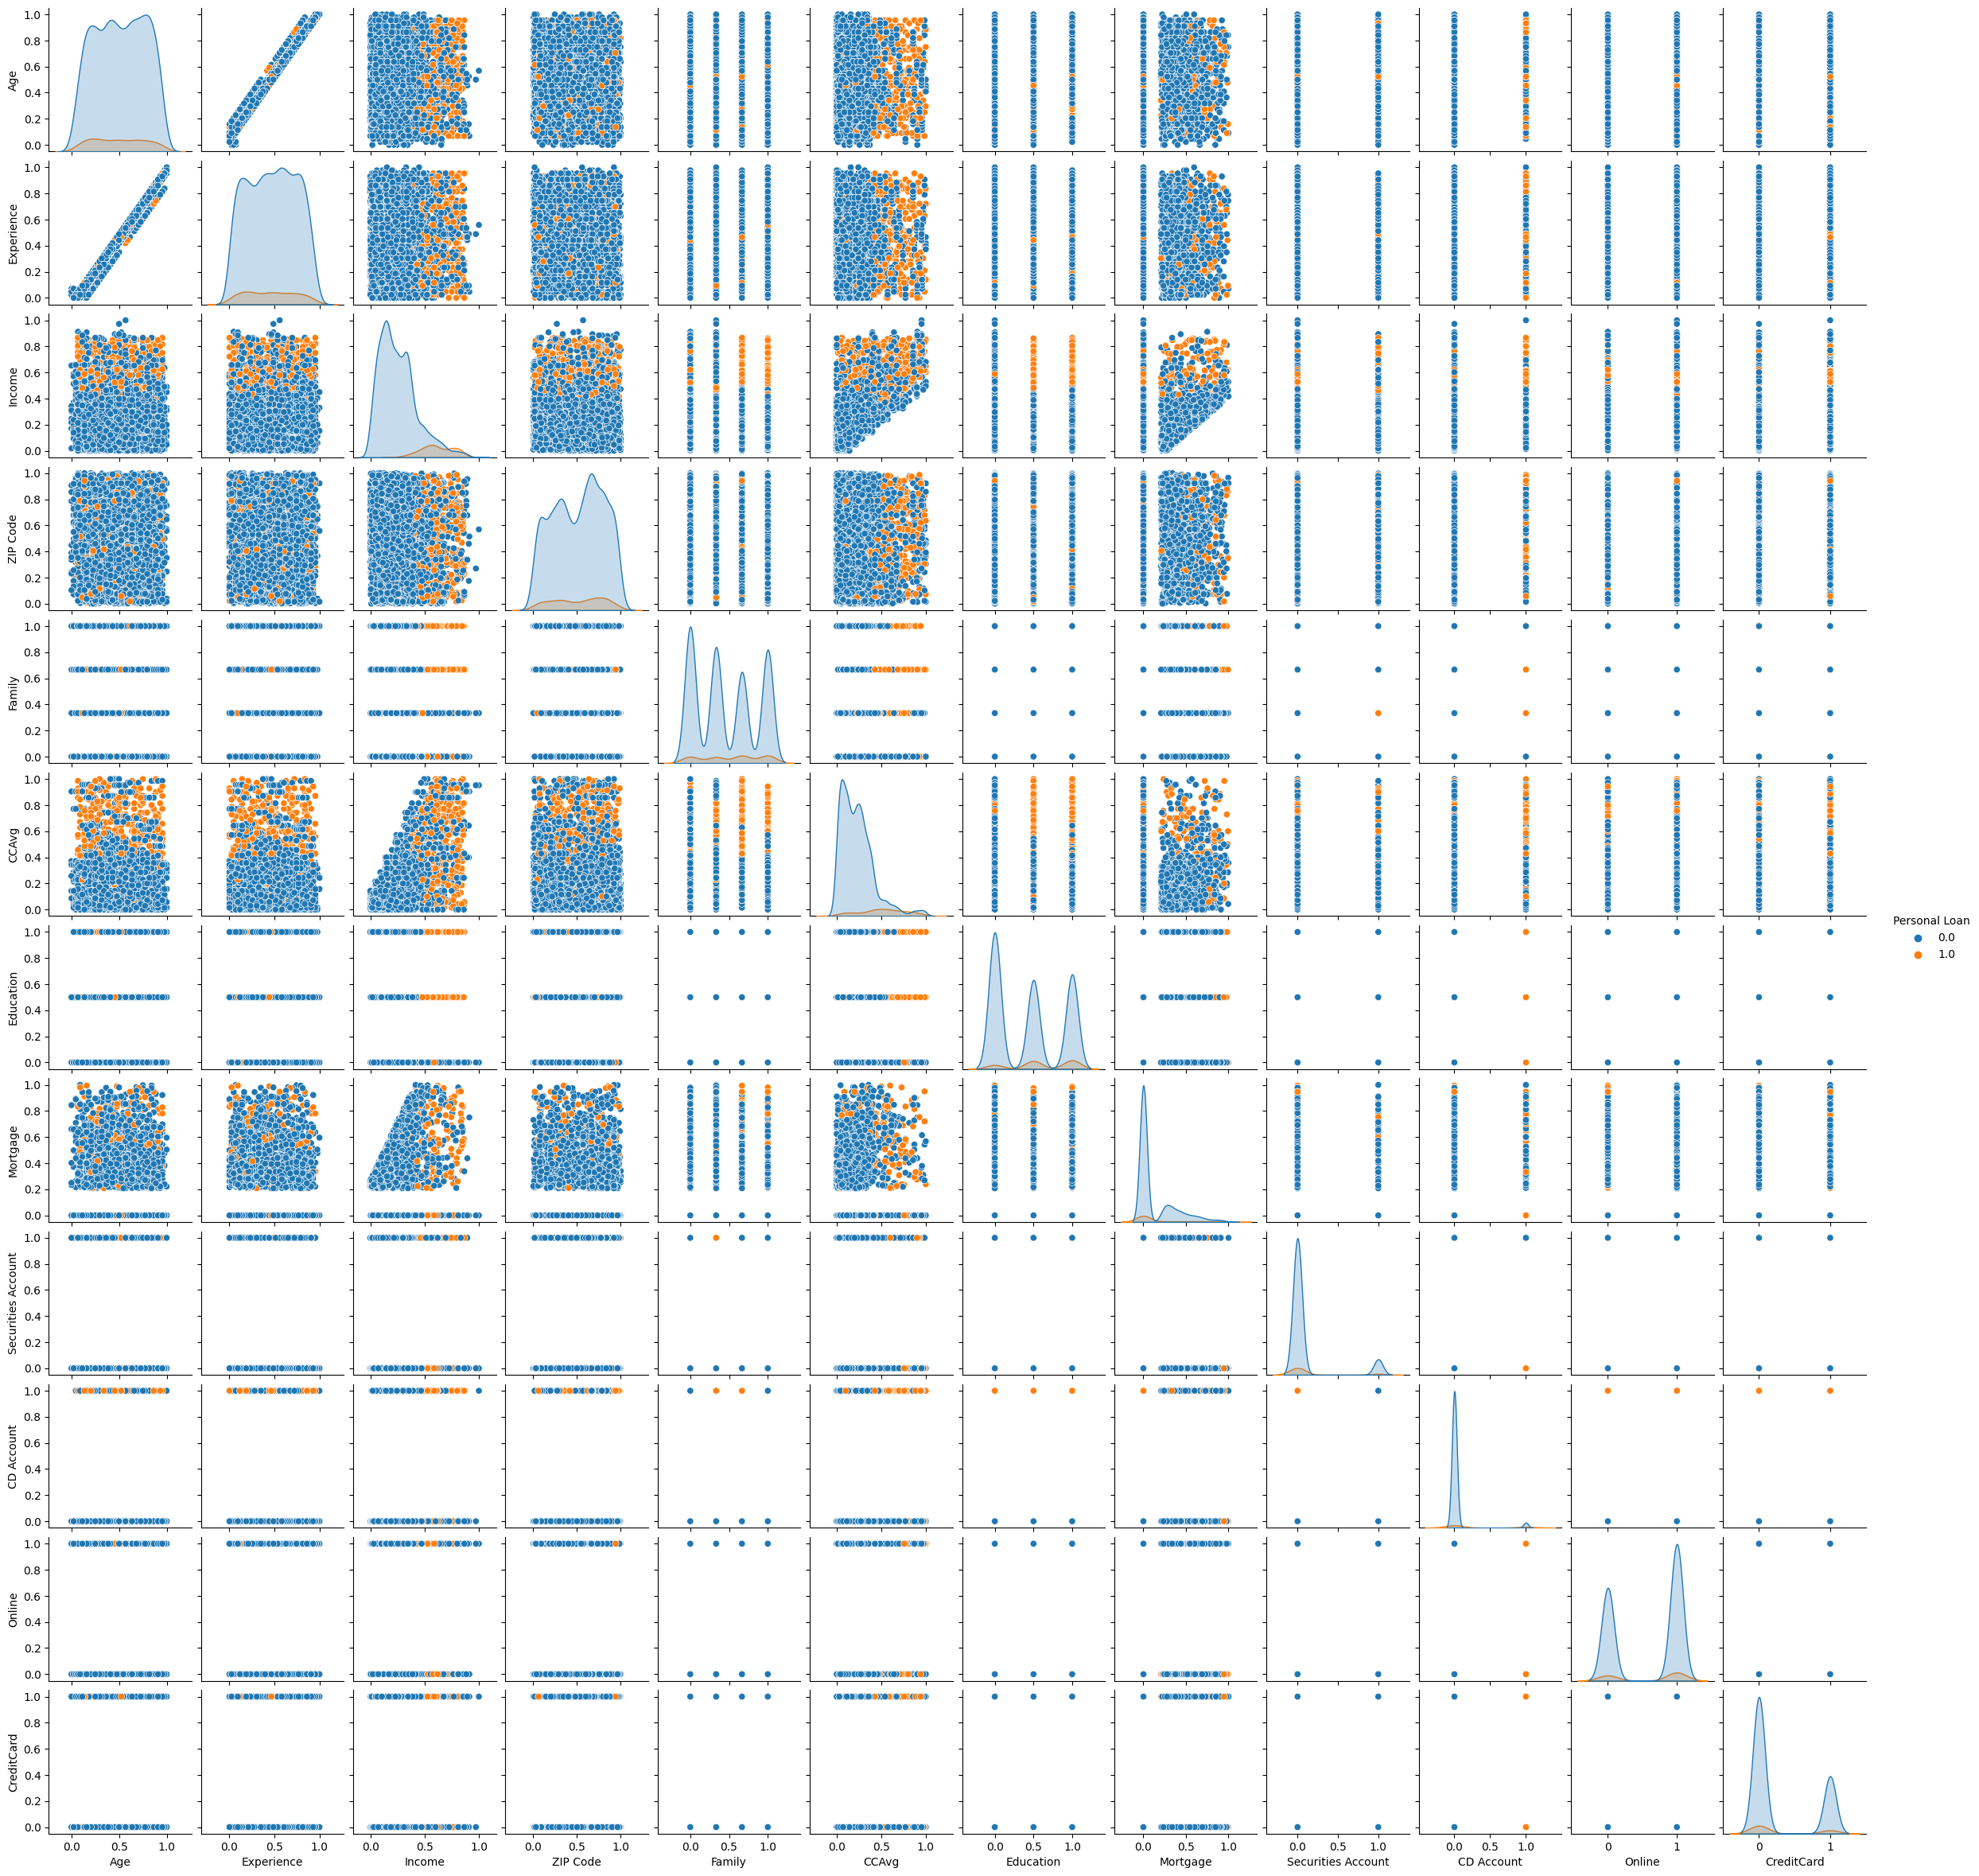

In [ ]:
%matplotlib inline
import seaborn as sns
sns.pairplot(Bank_Personal, hue='Personal Loan', height=2);
plt.savefig('pairplot.png')

By examining both the histogram and boxplot for each column, we can gain insights into the distribution, skewness, and presence of outliers in the data.

This is useful for visualizing the univariate distribution of each column, helping you identify patterns and potential issues in the data

column name : Age


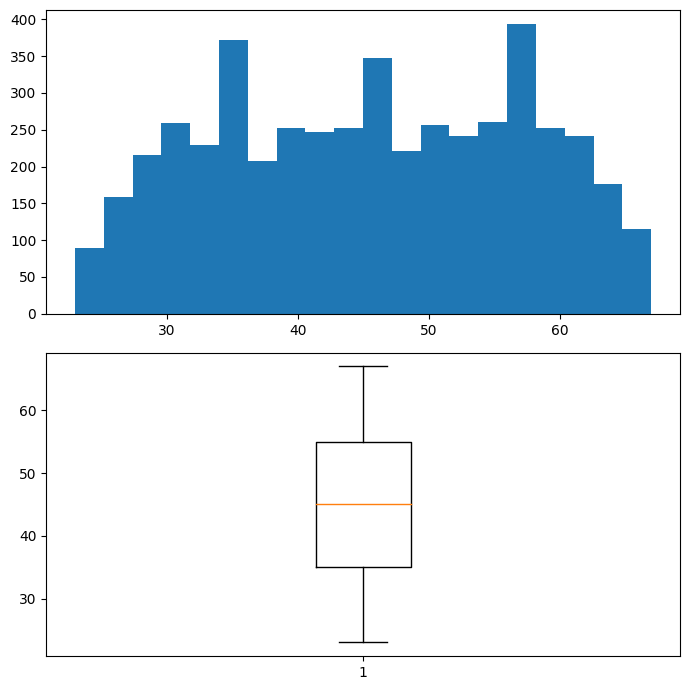

column name : Experience


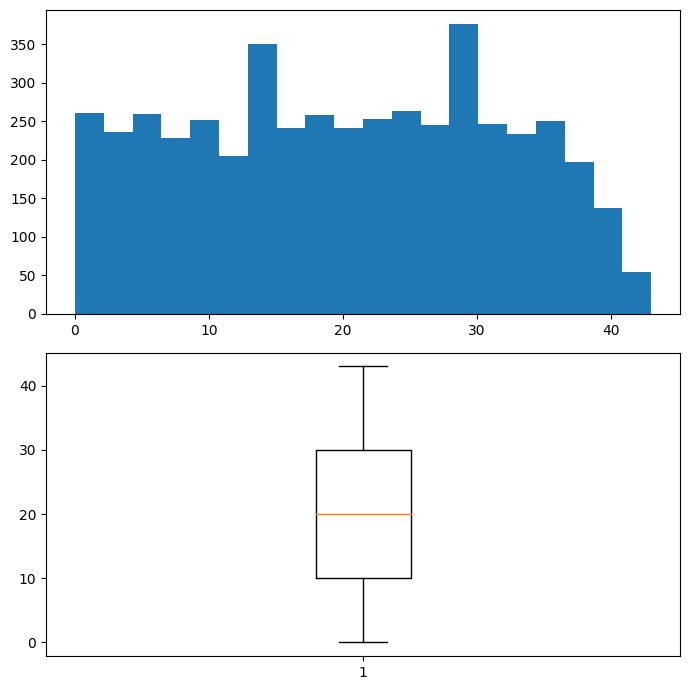

column name : Income


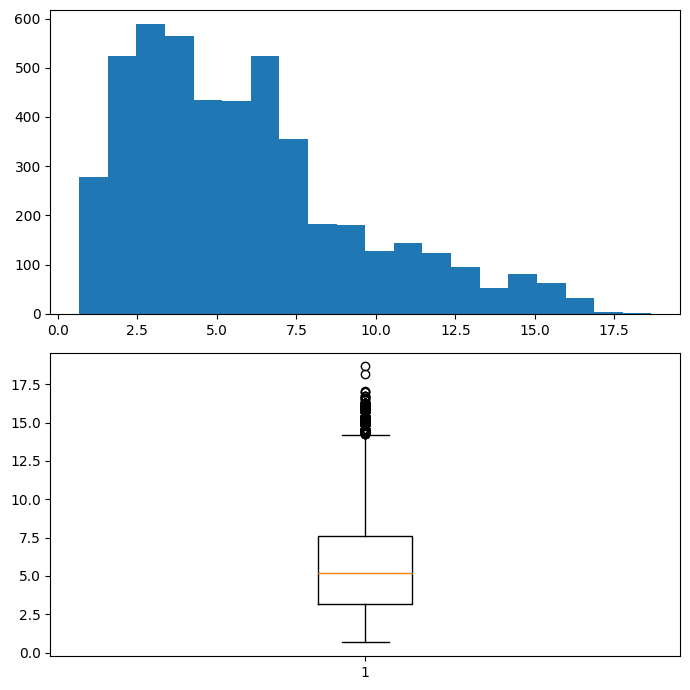

column name : ZIP Code


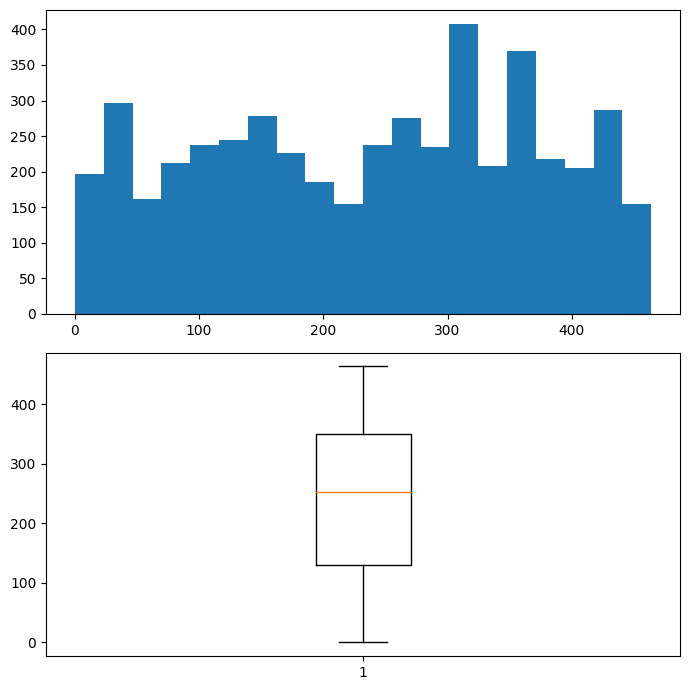

column name : Family


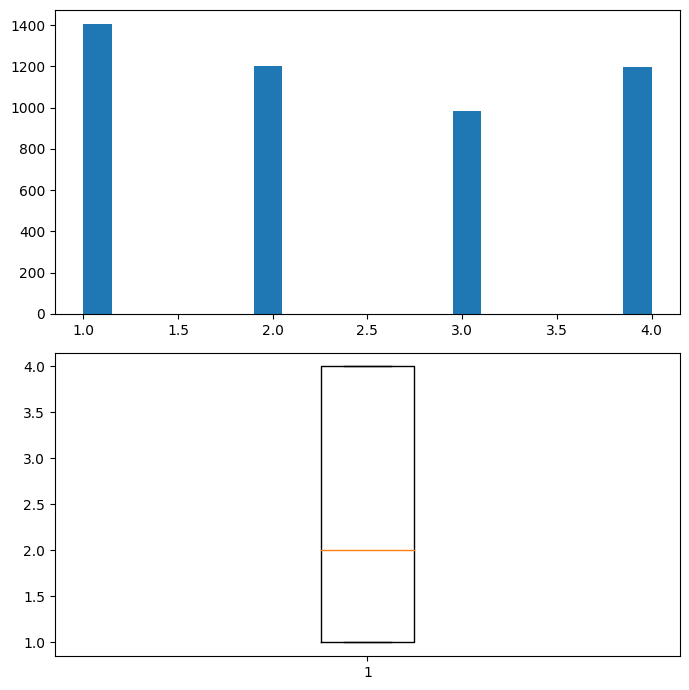

column name : CCAvg


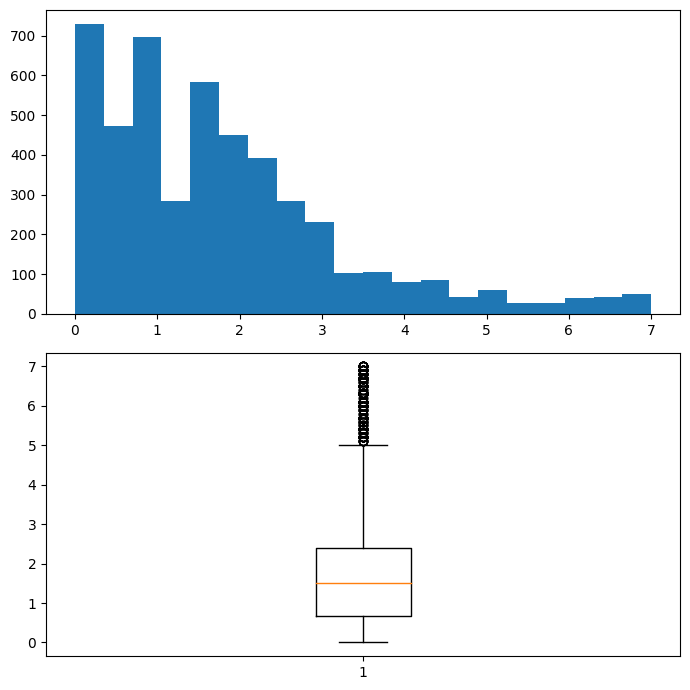

column name : Education


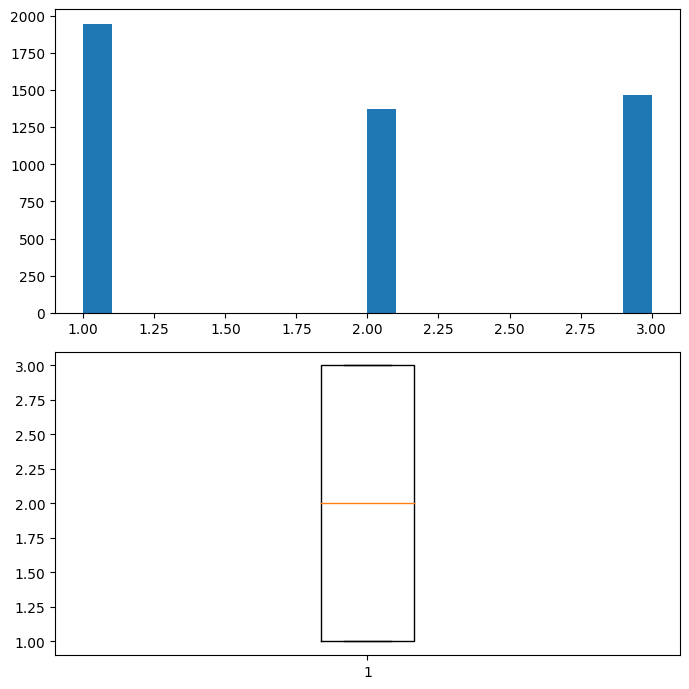

column name : Mortgage


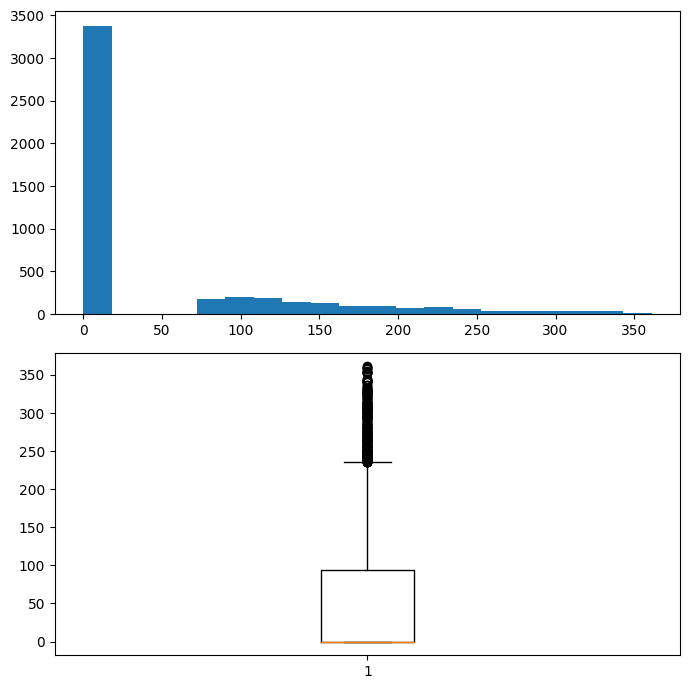

column name : Personal Loan


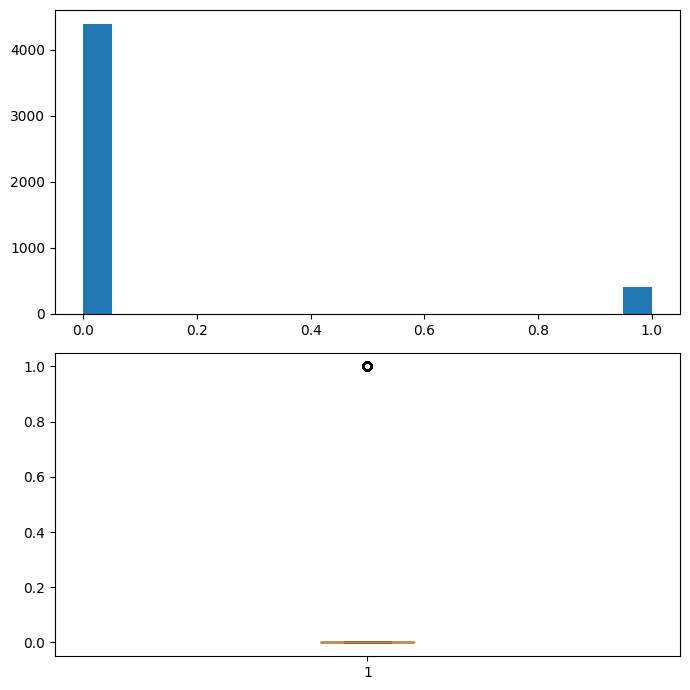

column name : Securities Account


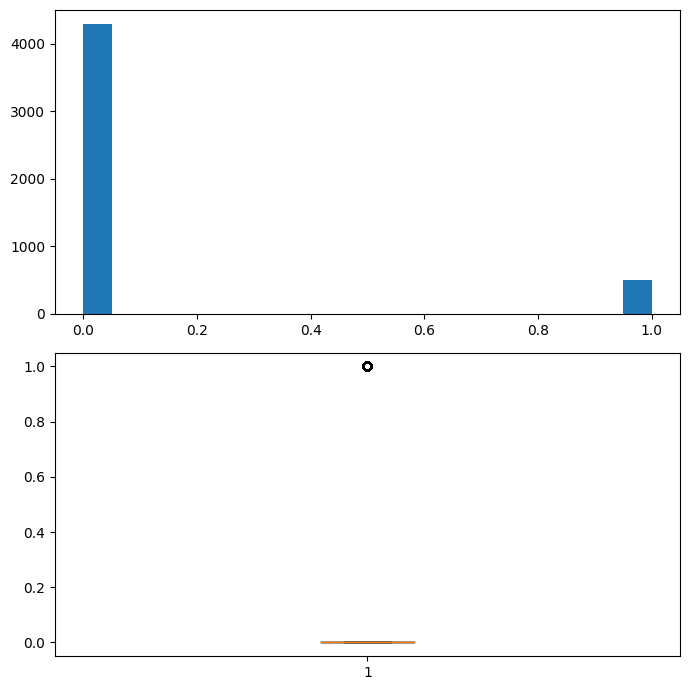

column name : CD Account


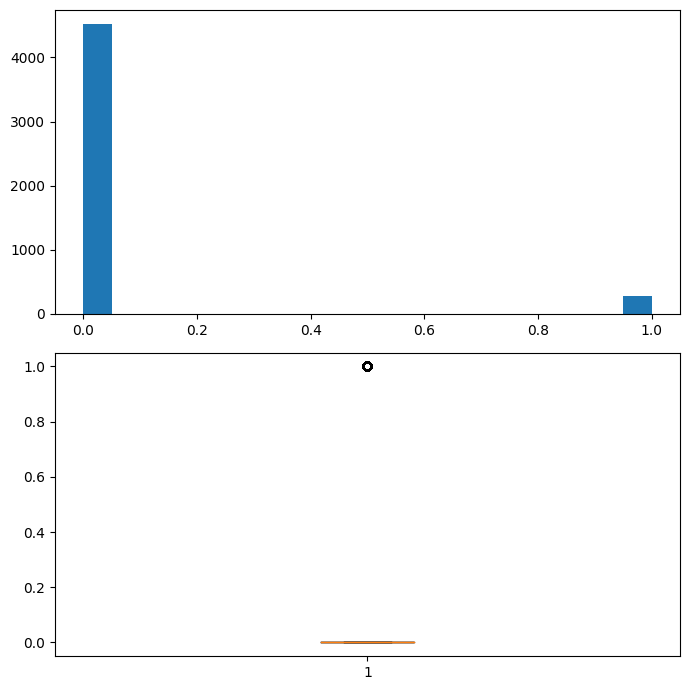

column name : Online


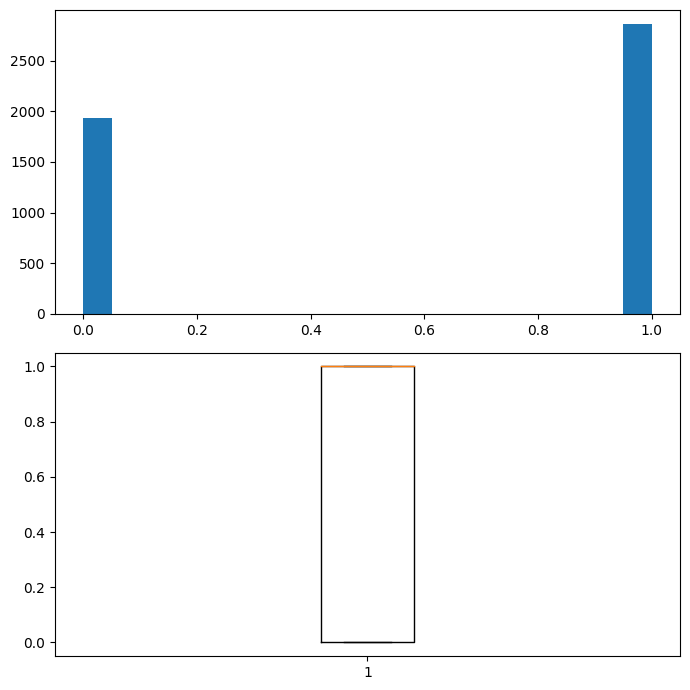

column name : CreditCard


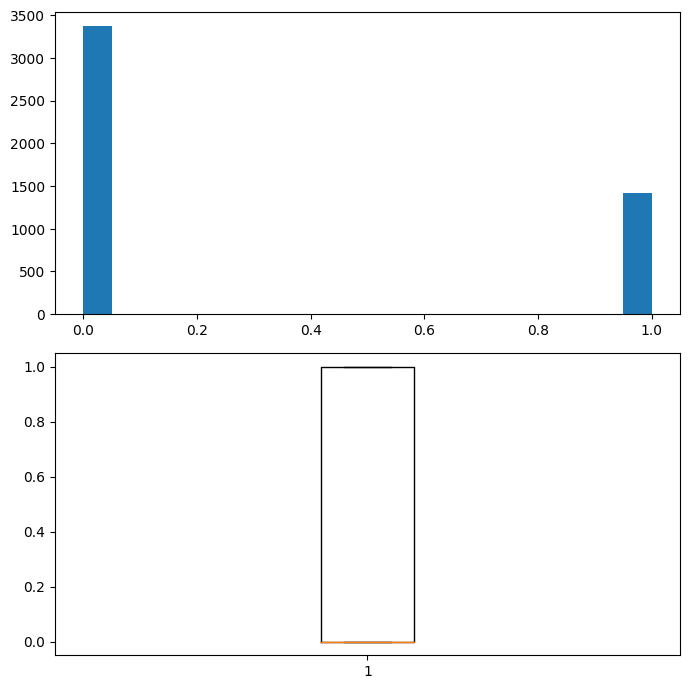

In [20]:
for col in Bank_Personal.columns:
    fig, axs = plt.subplots(nrows=2, figsize=(7,7))
    print("column name :",col)
    axs[0].hist(Bank_Personal[col], bins=20)
    axs[1].boxplot(Bank_Personal[col])
    plt.tight_layout()
    plt.show()

The code generates a grid of count plots for each categorical feature in our DataFrame against the target variable(personal loan)
Information Provided:

  Comparison of Categorical Features:

  Each subplot shows the count distribution of categories within a specific categorical feature.
  Differences in counts can be observed across categories for each feature.

  Impact on Target Variable:

   The hue (color) represents the target variable, allowing us to visually assess how the distribution of the target variable varies across categories of each feature.

  Insights into Relationships:

  Provides insights into how each categorical feature might be related to the target variable.
  Useful for identifying patterns and making decisions about feature importance.

<ipython-input-35-5ff7ddfccd77>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Personal Loan',data=Bank_Personal,ci=None)
<ipython-input-35-5ff7ddfccd77>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Personal Loan',data=Bank_Personal,ci=None)
<ipython-input-35-5ff7ddfccd77>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Personal Loan',data=Bank_Personal,ci=None)
<ipython-input-35-5ff7ddfccd77>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Personal Loan',data=Bank_Personal,ci=None)
<ipython-input-35-5ff7ddfccd77>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col,y='Personal Loan',data=Bank_Personal,ci=None)
<ipython-input-35-5ff7ddfccd77

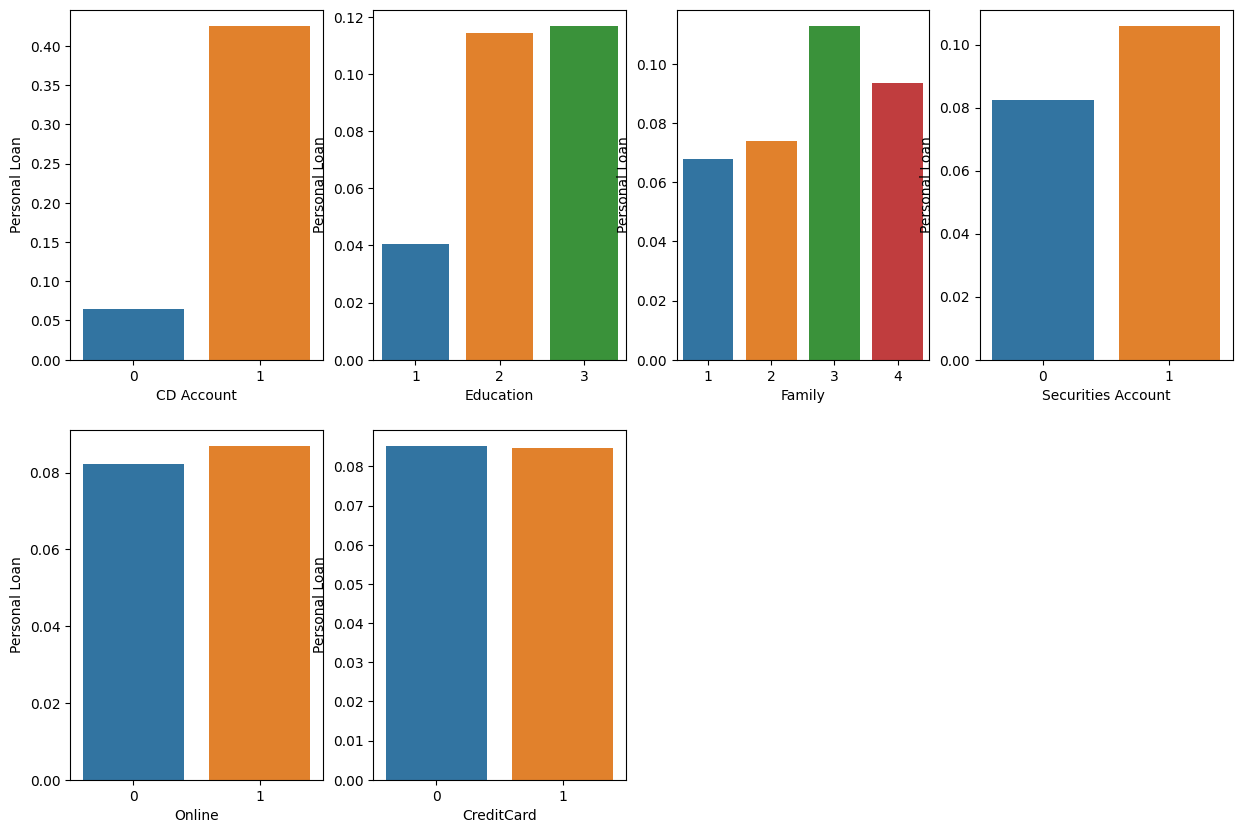

In [35]:
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(cat_Features):
    ax=fig.add_subplot(2,4,i+1)
    sns.barplot(x=col,y='Personal Loan',data=Bank_Personal,ci=None)
    plt.savefig("subplotxx")


  Customers with family size equal to 3 have more chances of having Personal Loan.
  Customers with Undergraduate degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree.
  Customers with CD Account and Securities Account have more chances of having Personal Loan.
  Customers with Online & Credit Card is more likely to have Personal Loan than others don't have a one.


<Axes: xlabel='Income', ylabel='Density'>

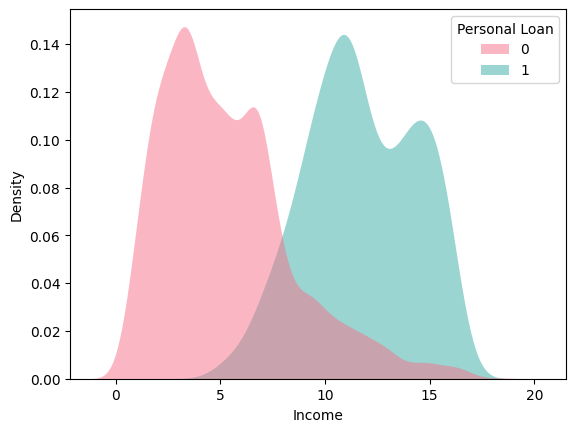

In [24]:
sns.kdeplot(
   data=Bank_Personal, x='Income', hue="Personal Loan",
   fill=True, common_norm=False, palette="husl",
   alpha=.5, linewidth=0,
)

the chart shows  that Personal Loan is more likely to happend when the Income increases.


<Axes: xlabel='Family', ylabel='Density'>

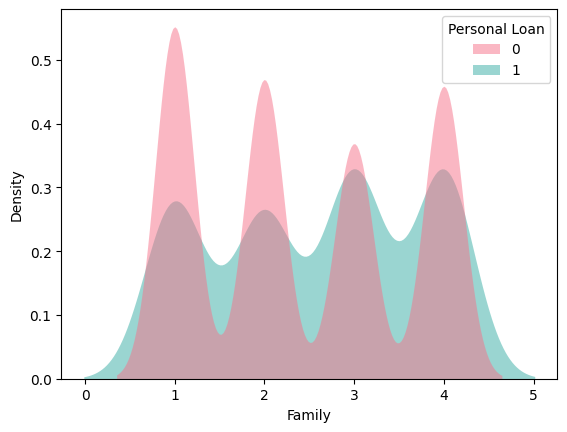

In [25]:
sns.kdeplot(
   data=Bank_Personal, x='Family', hue="Personal Loan",
   fill=True, common_norm=False, palette="husl",
   alpha=.5, linewidth=0,
)

the chart shows  that Personal Loan is more likely to be achieved when the Family members are bigger.

<Axes: xlabel='CCAvg', ylabel='Density'>

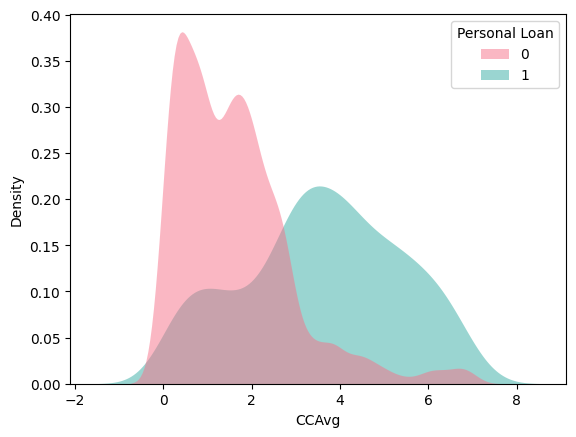

In [29]:
sns.kdeplot(
   data=Bank_Personal, x='CCAvg', hue="Personal Loan",
   fill=True, common_norm=False, palette="husl",
   alpha=.5, linewidth=0,
)


the chart shows  that Personal Loan is more likely to happend when the Credit Card Average of spending is higher.

<Axes: xlabel='Education', ylabel='Density'>

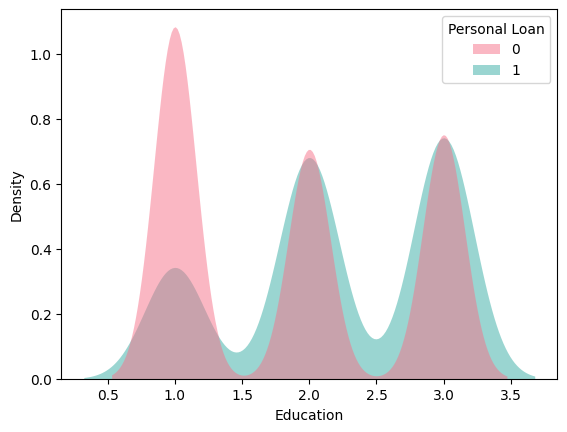

In [30]:
sns.kdeplot(
   data=Bank_Personal, x='Education', hue="Personal Loan",
   fill=True, common_norm=False, palette="husl",
   alpha=.5, linewidth=0,
)


the chart shows  that Personal Loan is more likely to happend when the Eduacation level is higher.

<Axes: xlabel='Mortgage', ylabel='Density'>

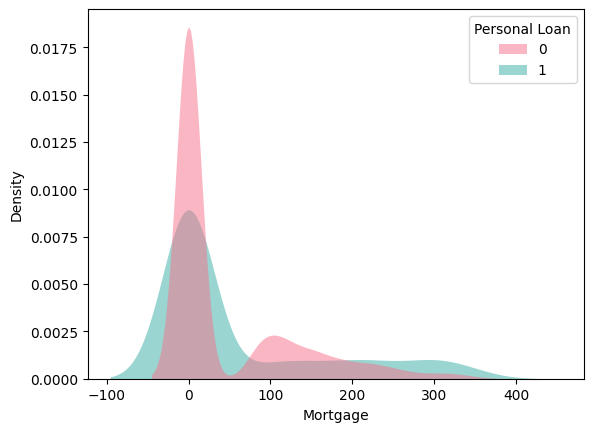

In [31]:
sns.kdeplot(
   data=Bank_Personal, x='Mortgage', hue="Personal Loan",
   fill=True, common_norm=False, palette="husl",
   alpha=.5, linewidth=0,
)

the chart shows that Personal Loan is more likely to happend when the Mortagage equal 0

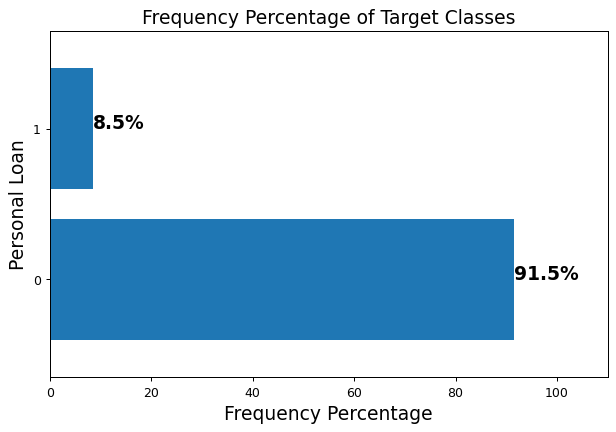

In [36]:
plt.figure(figsize=(35,20),dpi=90)
# Plot frequency percentages barplot
Bank_Personal['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = Bank_Personal['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

This code generates a scatter plot using Seaborn, visualizing the relationship between two numerical variables, 'Income' and 'CCAvg', with points color-coded based on the 'Personal Loan' variable.
this is Helpful for understanding the correlation or patterns between two numerical variables.
Allows exploration of how the 'Personal Loan' variable relates to the 'Income' and 'CCAvg' dimensions


<Axes: xlabel='Income', ylabel='CCAvg'>

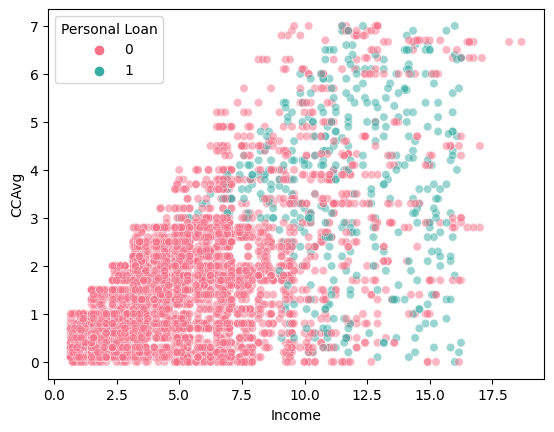

In [38]:
sns.scatterplot(x='Income', y='CCAvg', hue='Personal Loan', data=Bank_Personal, alpha=0.5, palette='husl')

#Applying scaling

 Min-max scaling is beneficial when numerical features have different scales, ensuring that each feature contributes equally to the model.
The code is useful for preprocessing data, especially when preparing it for machine learning algorithms that are sensitive to feature scales.

Note:

 Min-max scaling transforms the data such that the minimum value becomes 0, the maximum value becomes 1, and values in between are linearly scaled. The transformation is column-wise, and each feature is scaled independently

In [39]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = [col for col in Bank_Personal.select_dtypes(include=['float64', 'int64'])]
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the numerical columns for Test_space (excluding 'PassengerId')
Bank_Personal[numerical_columns] = scaler.fit_transform(Bank_Personal[numerical_columns])
Bank_Personal

Age  Experience    Income  ZIP Code    Family     CCAvg  Education  \
0     0.045455    0.023256  0.189815  0.174569  1.000000  0.228571        0.0   
1     0.500000    0.441860  0.120370  0.071121  0.666667  0.214286        0.0   
2     0.363636    0.348837  0.013889  0.786638  0.000000  0.142857        0.0   
3     0.272727    0.209302  0.425926  0.637931  0.000000  0.385714        0.5   
4     0.272727    0.186047  0.171296  0.200431  1.000000  0.142857        0.5   
...        ...         ...       ...       ...       ...       ...        ...   
4783  0.136364    0.069767  0.148148  0.443966  0.000000  0.271429        1.0   
4784  0.159091    0.093023  0.032407  0.297414  1.000000  0.057143        0.0   
4785  0.909091    0.906977  0.074074  0.500000  0.333333  0.042857        1.0   
4786  0.954545    0.930233  0.189815  0.030172  0.666667  0.071429        0.5   
4787  0.113636    0.093023  0.347222  0.403017  0.666667  0.114286        0.0   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0     0.000000            0.0                 1.0         0.0     0.0   
1     0.000000            0.0                 1.0         0.0     0.0   
2     0.000000            0.0                 0.0         0.0     0.0   
3     0.000000            0.0                 0.0         0.0     0.0   
4     0.000000            0.0                 0.0         0.0     0.0   
...        ...            ...                 ...         ...     ...   
4783  0.000000            0.0                 0.0         0.0     1.0   
4784  0.235457            0.0                 0.0         0.0     1.0   
4785  0.000000            0.0                 0.0         0.0     0.0   
4786  0.000000            0.0                 0.0         0.0     1.0   
4787  0.000000            0.0                 0.0         0.0     1.0   

      CreditCard  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            1.0  
...          ...  
4783         0.0  
4784         0.0  
4785         0.0  
4786         0.0  
4787         1.0  

[4788 rows x 13 columns]

#Train-Test Splitting

In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, make_scorer

In [41]:
x_o=Bank_Personal.drop('Personal Loan',axis=1)
y_o=Bank_Personal['Personal Loan']

In [42]:
from sklearn.model_selection import train_test_split
x_train_o,x_test_o,y_train_o,y_test_o=train_test_split(x_o,y_o,test_size=0.2,random_state=42,stratify=y_o)


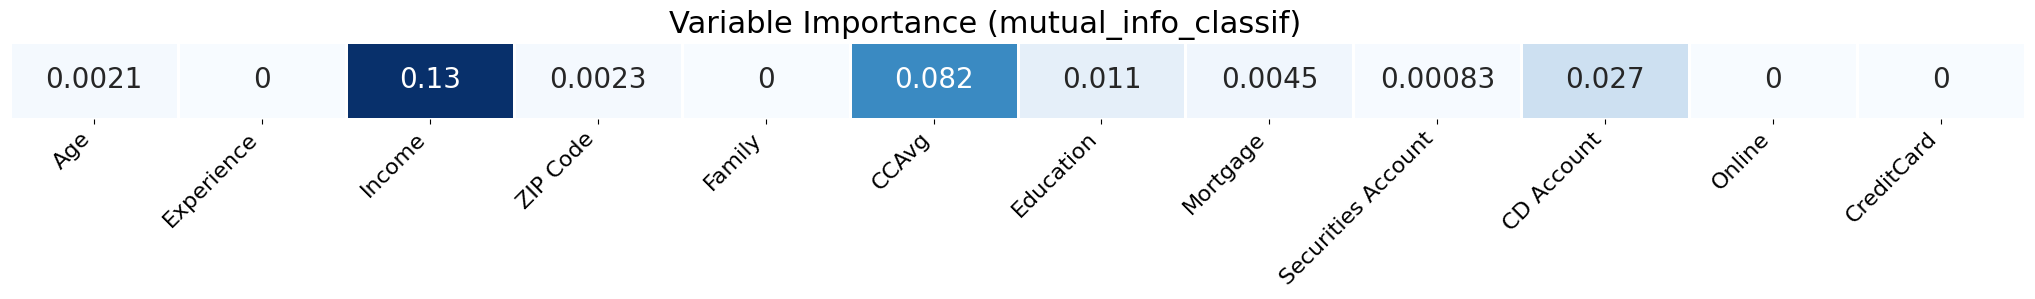

In [43]:
mutual_information = mutual_info_classif(x_train_o, y_train_o, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(x_train_o.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)



Observation: most Imortant features on dataset (Income, CCAvg, CD Account)


In [44]:
y_o.value_counts()


0.0    4381
1.0     407
Name: Personal Loan, dtype: int64

In [45]:
y_train_o.value_counts()

0.0    3504
1.0     326
Name: Personal Loan, dtype: int64

In [46]:
y_test_o.value_counts()

0.0    877
1.0     81
Name: Personal Loan, dtype: int64

#Models

first we want to check what kind of medel is better for us for this classification. and we check the accuracy and confustion matrix as an parameter to find the best model for classification. as we find out the tree classifier and random forest has the most accuracy so we choose them. but we just check naive bayes. based on our curosity to work on that and check the performnce.

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm, tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
random_state = 42
train_s = 20
cv = KFold(n_splits=10, random_state=1, shuffle=True)

classifiers = []
model1 = svm.SVC()
classifiers.append(model1)
model2 = tree.DecisionTreeClassifier()
classifiers.append(model2)
model3 = RandomForestClassifier()
classifiers.append(model3)
model4 = LogisticRegression(random_state=1)
classifiers.append(model4)
model5 = GaussianNB()
classifiers.append(model5)

In [48]:
for clf in classifiers:
    clf.fit(x_train_o, y_train_o)
    y_pred= clf.predict(x_test_o)
    acc = accuracy_score(y_test_o, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test_o, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of SVC() is 0.9718162839248434
Confusion Matrix of SVC() is [[873   4]
 [ 23  58]]
Accuracy of DecisionTreeClassifier() is 0.9812108559498957
Confusion Matrix of DecisionTreeClassifier() is [[869   8]
 [ 10  71]]
Accuracy of RandomForestClassifier() is 0.9895615866388309
Confusion Matrix of RandomForestClassifier() is [[876   1]
 [  9  72]]
Accuracy of LogisticRegression(random_state=1) is 0.954070981210856
Confusion Matrix of LogisticRegression(random_state=1) is [[865  12]
 [ 32  49]]
Accuracy of GaussianNB() is 0.894572025052192
Confusion Matrix of GaussianNB() is [[812  65]
 [ 36  45]]


#Decision Tree Model

In [49]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42)
estimator.fit(x_train_o, y_train_o);

In [50]:
y_predicted_train = estimator.predict(x_train_o)
accuracy_train = accuracy_score(y_predicted_train, y_train_o)*100
print("The accuracy on training set is {0:.1f}%".format(accuracy_train))

The accuracy on training set is 100.0%


In [51]:
y_predicted_test = estimator.predict(x_test_o)
accuracy_ho = accuracy_score(y_test_o, y_predicted_test) * 100
fitted_max_depth = estimator.tree_.max_depth
fitted_x = train_s
initial_impurity = estimator.tree_.impurity[0] # the impurity variable of tree_ contains the impurities of all the nodes
print("The accuracy on test set is {0:.1f}%".format(accuracy_ho))
print("The maximum depth of the tree fitted on X_train is {}".format(fitted_max_depth))

parameter_values = range(1,fitted_max_depth+1)
# parameter_values = np.linspace(0, initial_impurity, 31)

The accuracy on test set is 98.5%
The maximum depth of the tree fitted on X_train is 14


In [52]:
avg_scores = []
for par in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy"
                                            , max_depth = par
                                            , random_state = random_state
                                            )
    scores = cross_val_score(estimator, x_train_o, y_train_o
                             , scoring='accuracy', cv = 5)
    # cross_val_score produces an array with one score for each fold
    avg_scores.append(np.mean(scores))
print(avg_scores)

[0.9148825065274151, 0.9514360313315928, 0.9783289817232376, 0.985378590078329, 0.9843342036553524, 0.9830287206266318, 0.9796344647519583, 0.9825065274151437, 0.9814621409921671, 0.9817232375979111, 0.9819843342036554, 0.9822454308093993, 0.9832898172323759, 0.9832898172323759]


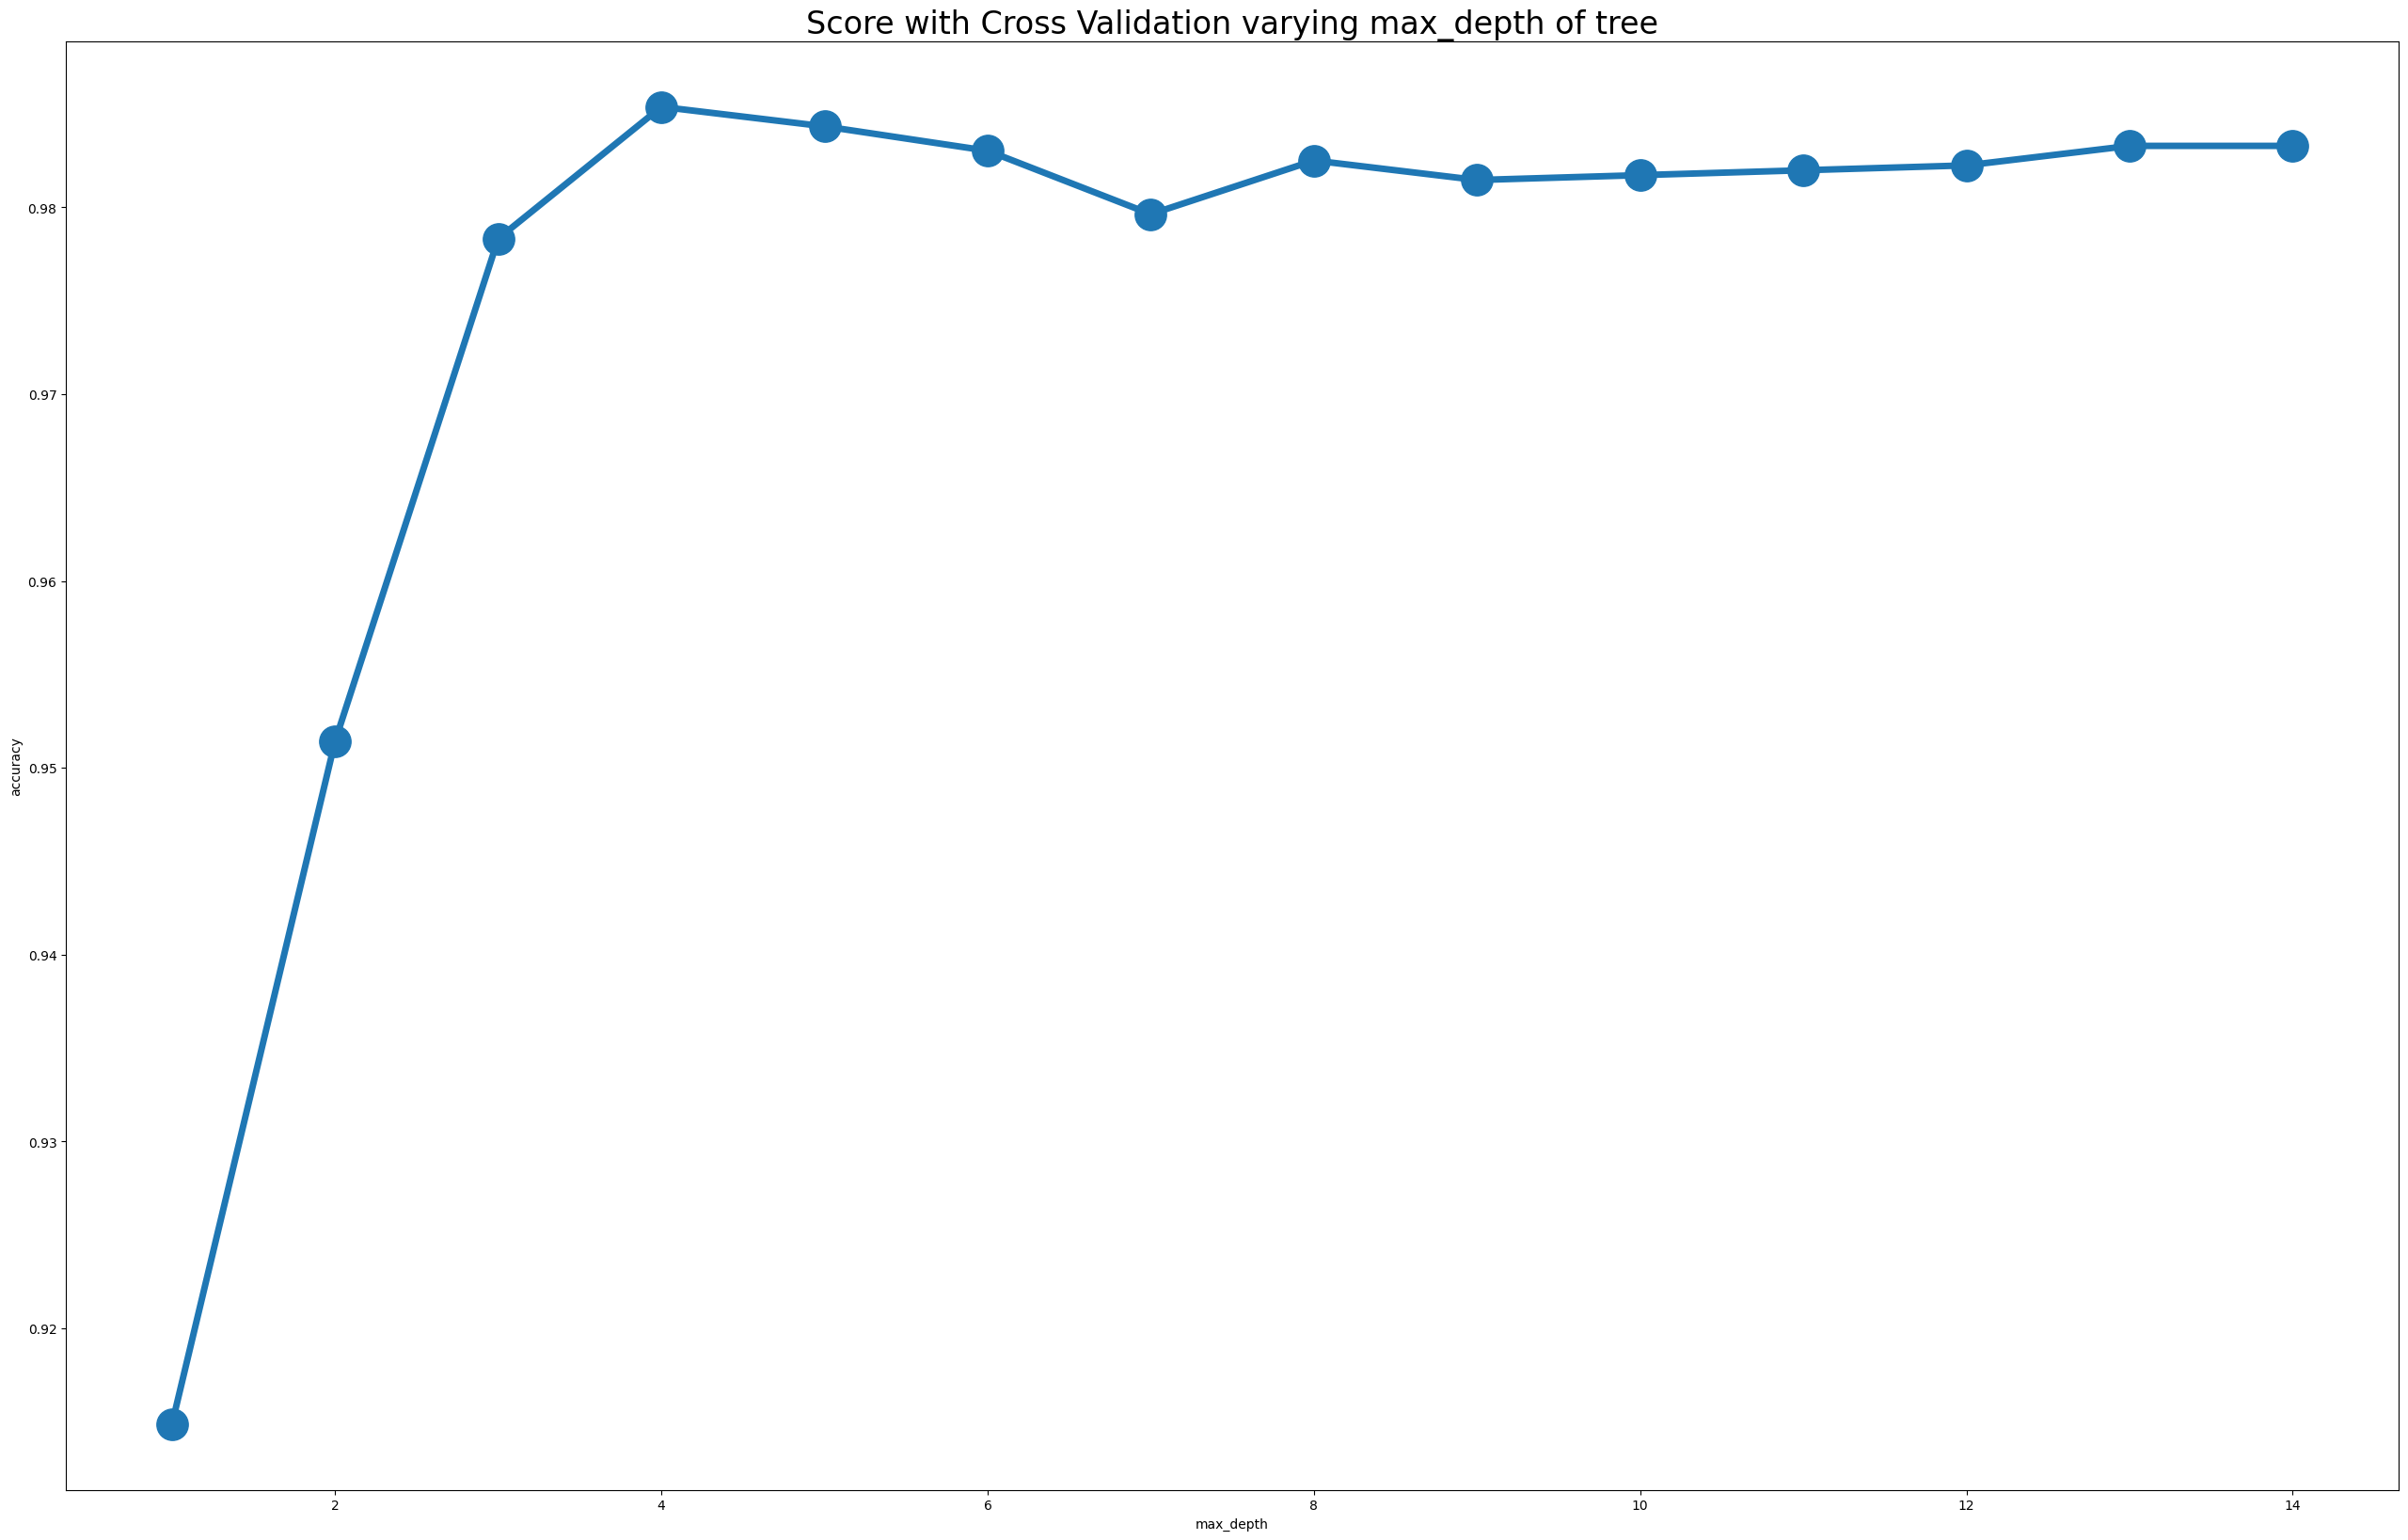

In [53]:
plt.figure(figsize=(32,20))
plt.plot(parameter_values, avg_scores, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Score with Cross Validation varying max_depth of tree", fontsize = 24)
plt.show();

In [54]:
top_par_cv = parameter_values[np.argmax(avg_scores)]
estimator = tree.DecisionTreeClassifier(criterion="entropy", max_depth = top_par_cv)
estimator.fit(x_train_o,y_train_o);
y_predicted = estimator.predict(x_test_o)
accuracy_cv = accuracy_score(y_test_o, y_predicted) * 100
print("The accuracy on test set tuned with cross_validation is {:.1f}% with depth of the tree {}".format(accuracy_cv , top_par_cv))

The accuracy on test set tuned with cross_validation is 98.5% with depth of the tree 4


In [ ]:
print(classification_report(y_test_o, y_predicted))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       877
         1.0       0.94      0.89      0.91        81

    accuracy                           0.99       958
   macro avg       0.96      0.94      0.95       958
weighted avg       0.99      0.99      0.99       958



Class 0 (0.0):

  Precision: 1.00

  Interpretation: 100% of the instances predicted as Class 0 were actually Class 0.

  Recall (Sensitivity or True Positive Rate): 1.00

  Interpretation: The model correctly identified 100% of the instances of Class 0.

 F1-Score: 1.00

 Interpretation: The balance between precision and recall for Class 0 is excellent.


Class 1 (1.0):

  Precision: 0.97

  Interpretation: 97% of the instances predicted as Class 1 were actually Class 1.

 Recall: 0.96

  Interpretation: The model identified 96% of the instances of Class 1.

  F1-Score: 0.96

   Interpretation: The balance between precision and recall for Class 1 is very good.

   

  The high precision and recall for both classes suggest that the model is performing very well on the given dataset.
The F1-score provides a balanced measure of performance, considering both precision and recall.


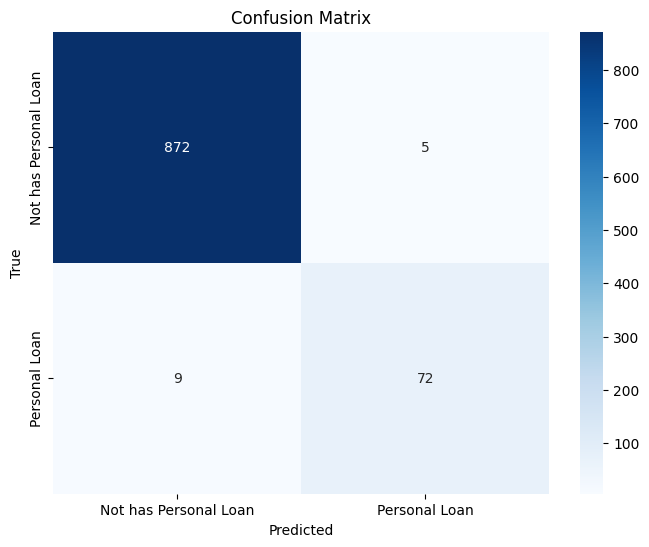

In [ ]:
cm = confusion_matrix(y_test_o, y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not has Personal Loan', 'Personal Loan'], yticklabels=['Not has Personal Loan', 'Personal Loan'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 250, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train_o,y_train_o)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1]},
                   random_state=42, verbose=2)

In [ ]:
randomforestmodel=RandomForestClassifier(n_estimators= 1,
 min_samples_split = 10,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth= 90,
 bootstrap= False)

In [ ]:
randomforestmodel.fit(x_train_o,y_train_o)

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1)

In [ ]:
y_pred_rf=randomforestmodel.predict(x_test_o)

In [ ]:
rf_accuracy = accuracy_score(y_test_o, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test_o, y_pred_rf)
rf_classification_rep = classification_report(y_test_o, y_pred_rf)

In [ ]:
print(f'rf_Accuracy: {rf_accuracy:.2f}')

rf_Accuracy: 0.98


In [ ]:
print(rf_classification_rep)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       877
         1.0       0.95      0.85      0.90        81

    accuracy                           0.98       958
   macro avg       0.97      0.92      0.94       958
weighted avg       0.98      0.98      0.98       958



The Random Forest classifier performs well for both classes, with high precision, recall, and F1-score for Class 0.
For Class 1, the model still maintains a good balance between precision and recall, but the metrics are slightly lower compared to Class 0.

Precision: 0.98

Interpretation: 98% of the instances predicted as Class 0 were actually Class 0.

Recall (Sensitivity or True Positive Rate): 0.98

Interpretation: The model correctly identified 98% of the instances of Class 0.

F1-Score: 0.98

Interpretation: The balance between precision and recall for Class 0 is excellent.

Interpretation:

High precision indicates that when the model predicts a certain class, it is likely to be correct.
High recall indicates that the model can capture a large proportion of actual instances of a class.
F1-score is a harmonic mean of precision and recall, providing a balance between the two metrics.

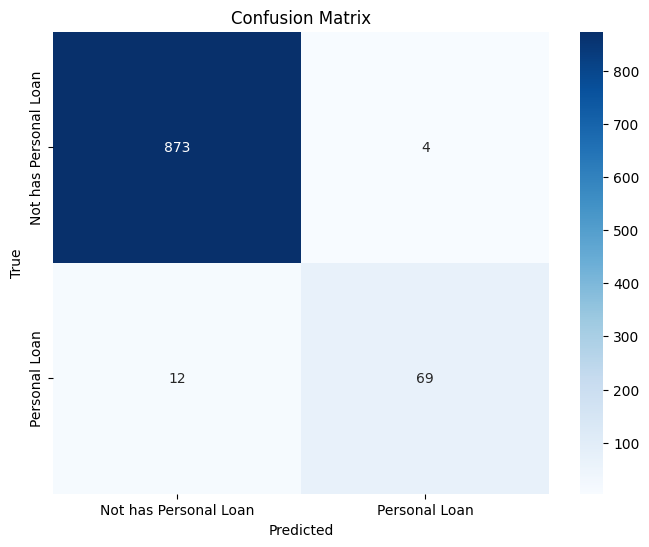

In [ ]:
cm = rf_conf_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not has Personal Loan', 'Personal Loan'], yticklabels=['Not has Personal Loan', 'Personal Loan'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#Naive Base Model


In [ ]:
GussianClassifier = GaussianNB()
GussianClassifier.fit(x_train_o,y_train_o)
y_pred=GussianClassifier.predict(x_test_o)
print("===================================> Result <===================================")
print("Accuracy                     = " ,metrics.accuracy_score(y_test_o,y_pred))
print("F1 Score                     = " ,metrics.f1_score(y_test_o,y_pred))

===================================> Result <===================================
Accuracy                     =  0.894572025052192
F1 Score                     =  0.4712041884816754


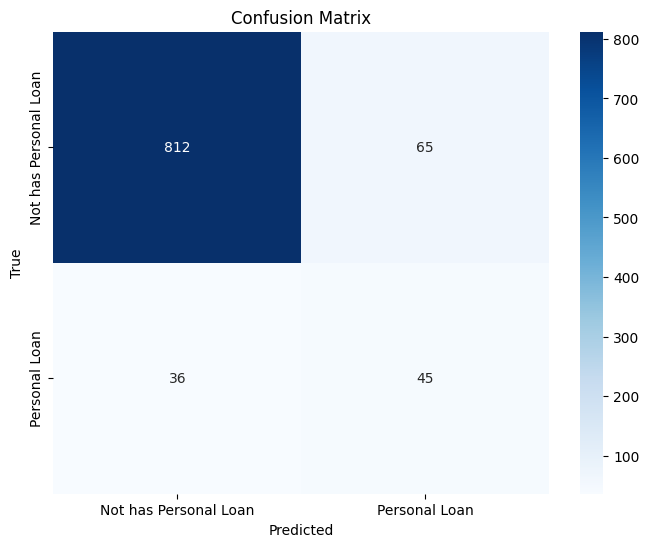

In [ ]:
cm = confusion_matrix(y_test_o,GussianClassifier.predict(x_test_o))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not has Personal Loan', 'Personal Loan'], yticklabels=['Not has Personal Loan', 'Personal Loan'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
print(classification_report(y_o,GussianClassifier.predict(x_o)))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      4381
         1.0       0.45      0.60      0.51       407

    accuracy                           0.90      4788
   macro avg       0.70      0.77      0.73      4788
weighted avg       0.92      0.90      0.91      4788



Class 0 (0.0):

  Precision: 0.95

  Interpretation: 95% of the instances predicted as Class 0 were actually Class 0.

  Recall (Sensitivity or True Positive Rate): 0.91

  Interpretation: The model correctly identified 91% of the instances of Class 0.

  F1-Score: 0.93

  Interpretation: The balance between precision and recall for Class 0 is good.

  Class 1 (1.0):

  Precision: 0.41

  Interpretation: 41% of the instances predicted as Class 1 were actually Class 1.

  Recall: 0.57

  Interpretation: The model identified 57% of the instances of Class 1.

  F1-Score: 0.48

  Interpretation: The balance between precision and recall for Class 1 is moderate.

  Interpretation:

 High precision for Class 0 indicates that when the model predicts Class 0, it is likely to be correct.
 The lower precision for Class 1 suggests that the model may have some false positives for this class.
 The recall for Class 1 suggests that the model captures more than half of the actual instances of Class 1.
 The F1-score provides a balanced measure of performance, considering both precision and recall.